# 3. Análisis de emociones en tweets

**a)** Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.

In [1]:
import pandas as pd
tweets = pd.read_csv('./data/text_emotion.csv')
tweets.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [2]:
clases = pd.DataFrame(tweets['sentiment'].value_counts().reset_index())
clases.columns = ["sentiment", "count"]
clases

,sentiment,count
0,neutral,8638
1,worry,8459
2,happiness,5209
3,sadness,5165
4,love,3842
5,surprise,2187
6,fun,1776
7,relief,1526
8,hate,1323
9,empty,827


El dataset cuenta con cuatro columnas, las que corresponden a el id del tweet, el autor y el contenido de este, junto con el sentimiento asociado al contenido.
Los sentimientos encontrados son 13, contando "neutral" como uno de ellos.

**b)** Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos.

La máscara se aplicará después de pre-procesar el dataset y antes de entrenar el clasificador

**c)** Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado en el cual se podrán trabajar.

In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, TweetTokenizer
from nltk.corpus import stopwords
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felipemorales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipemorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = tweets.copy()

ps = PorterStemmer()
sw = stopwords.words('english')
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

df['norm_content'] = df['content'].apply(lambda x: tknzr.tokenize(x.lower()))
df['norm_content'] = df['norm_content'].apply(lambda x: [w for w in x if (w not in sw and len(w)>2)])
df['norm_content'] = df['norm_content'].apply(lambda x: [ps.stem(w) for w in x])
df.head()

,tweet_id,sentiment,author,content,norm_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, start, f..."
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,"[layin, bed, headach, ughhh, ..., waitin, call..."
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,"[funer, ceremoni, ..., gloomi, friday, ...]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,"[want, trade, someon, houston, ticket, one]"


Ahora se hace la separación de test - train

In [5]:
import numpy as np
np.random.seed(14)
msk = np.random.rand(len(df)) < 0.8

# manual preprocess
df_train = df[msk].copy()
df_test = df[~msk].copy()

# default countvector preprocess
df_train_df = df[msk].copy()

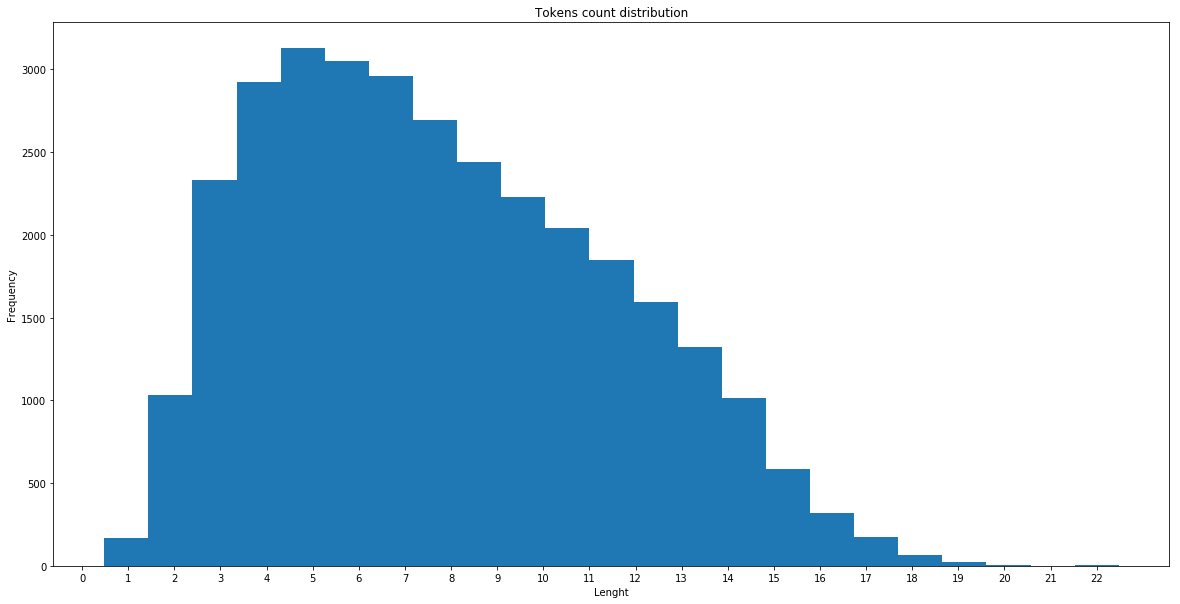

In [6]:
import matplotlib.pyplot as plt

length = df_train['norm_content'].map(len)

plt.figure(figsize=(20,10))
plt.hist(length, bins=(max(length)-min(length)+1), align='right')
plt.title("Tokens count distribution")
plt.xlabel("Lenght")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(length), max(length)+1, 1))
plt.show()

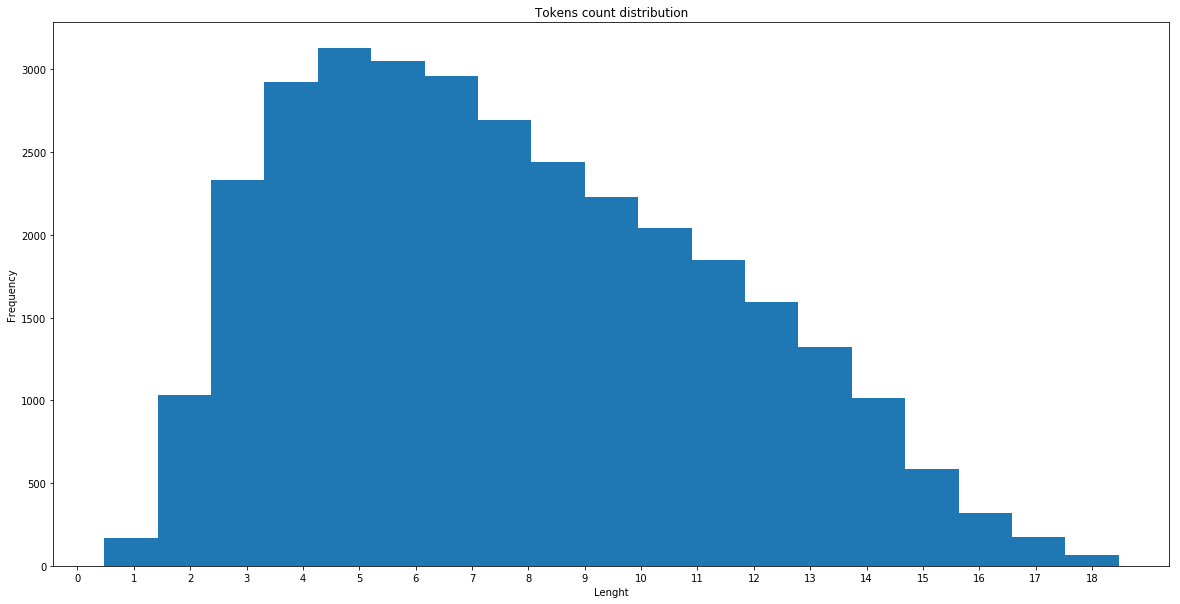

In [7]:
length = df_train['norm_content'].map(len)
df_train = df_train[np.abs(length-length.mean())<=(3*length.std())] 
length = df_train['norm_content'].map(len)

plt.figure(figsize=(20,10))
plt.hist(length, bins=(max(length)-min(length)+1), align='right')
plt.title("Tokens count distribution")
plt.xlabel("Lenght")
plt.ylabel("Frequency")
plt.xticks(np.arange(min(length), max(length)+1, 1))
plt.show()

**d)** Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases. Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los datos puede afectar considerablemente al modelo.

In [8]:
pos = ['neutral', 'happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm']

df_train['clase'] = df_train['sentiment'].apply(lambda x: 1 if x in pos else -1)
df_train_df['clase'] = df_train_df['sentiment'].apply(lambda x: 1 if x in pos else -1)

df_test['clase'] = df_test['sentiment'].apply(lambda x: 1 if x in pos else -1)

print(df_train_df['clase'].value_counts()+df_test['clase'].value_counts())
df.head()

 1    23937
-1    16063
Name: clase, dtype: int64


,tweet_id,sentiment,author,content,norm_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, start, f..."
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,"[layin, bed, headach, ughhh, ..., waitin, call..."
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,"[funer, ceremoni, ..., gloomi, friday, ...]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,"[want, trade, someon, houston, ticket, one]"


**e)** Construir un clasificador que determine automáticamente la polaridad de un trozo de texto.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def echo(args):
    return args

# Pre-proceso propio
vectorizer = CountVectorizer(tokenizer=echo, preprocessor=echo, lowercase=False)
X_train = vectorizer.fit_transform(df_train['norm_content'])
X_test = vectorizer.transform(df_test['norm_content'])

# Pre-proseso por default de CountVectorizer
vectorizer_df = CountVectorizer()
X_train_df = vectorizer_df.fit_transform(df_train_df['content'])
X_test_df = vectorizer_df.transform(df_test['content'])

**f)** Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

In [10]:
def train(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    print(name+" scores:    \t train: %.3f \t test: %.3f"%(score_train,score_test))

    return (name, model, score_train, score_test)

In [11]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = train("Naive Bayes",BernoulliNB(), X_train, df_train['clase'], X_test, df_test['clase'])
naive_bayes_df = train("Naive Bayes df",BernoulliNB(), X_train_df, df_train_df['clase'], X_test_df, df_test['clase'])

Naive Bayes scores:    	 train: 0.810 	 test: 0.706
Naive Bayes df scores:    	 train: 0.840 	 test: 0.697


In [12]:
from sklearn.naive_bayes import MultinomialNB
multi_naive_bayes = train("Multi Naive Bayes",MultinomialNB(), X_train, df_train['clase'], X_test, df_test['clase'])
multi_naive_bayes_df = train("Multi Naive Bayes df", MultinomialNB(), X_train_df, df_train_df['clase'], X_test_df, df_test['clase'])

Multi Naive Bayes scores:    	 train: 0.821 	 test: 0.709
Multi Naive Bayes df scores:    	 train: 0.863 	 test: 0.710


In [13]:
from sklearn.linear_model import LogisticRegression
logistic = train("LogisticRegression",LogisticRegression(), X_train, df_train['clase'], X_test, df_test['clase'])
logistic_df = train("LogisticRegression df",LogisticRegression(), X_train_df, df_train_df['clase'], X_test_df, df_test['clase'])

LogisticRegression scores:    	 train: 0.834 	 test: 0.713
LogisticRegression df scores:    	 train: 0.884 	 test: 0.718


In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = train("DecisionTree",DecisionTreeClassifier(), X_train, df_train['clase'], X_test, df_test['clase'])
decision_tree_df = train("DecisionTree df",DecisionTreeClassifier(), X_train_df, df_train_df['clase'], X_test_df, df_test['clase'])

DecisionTree scores:    	 train: 0.992 	 test: 0.635
DecisionTree df scores:    	 train: 0.999 	 test: 0.657


In [15]:
from sklearn.linear_model import SGDClassifier
gradient_descent = train("SGD",SGDClassifier(max_iter=5,tol=None), X_train, df_train['clase'], X_test, df_test['clase'])
gradient_descent_df = train("SGD df",SGDClassifier(max_iter=5,tol=None), X_train_df, df_train_df['clase'], X_test_df, df_test['clase'])

SGD scores:    	 train: 0.804 	 test: 0.712
SGD df scores:    	 train: 0.820 	 test: 0.703


In [16]:
import matplotlib.pyplot as plt
def plot_scores(title,models):
    N = len(models)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.45         # the width of the bars

    fig, ax = plt.subplots()

    test_scores = list(m[2] for m in models)
    train_scores = list(m[3] for m in models)

    rects1 = ax.bar(ind, test_scores, width, color='#00b1ff')
    rects1b = ax.bar(ind+width, train_scores, width, color='#0070ff')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels((m[0] for m in models),fontsize='xx-small')

    ax.legend((rects1[0], rects1b[0]), ('Train', 'Test'), loc='lower right')


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%.1f%%' % (100*height),
                    ha='center', va='bottom', fontsize='x-small')

    autolabel(rects1)
    autolabel(rects1b)
    fig.set_dpi(170)

    plt.show()

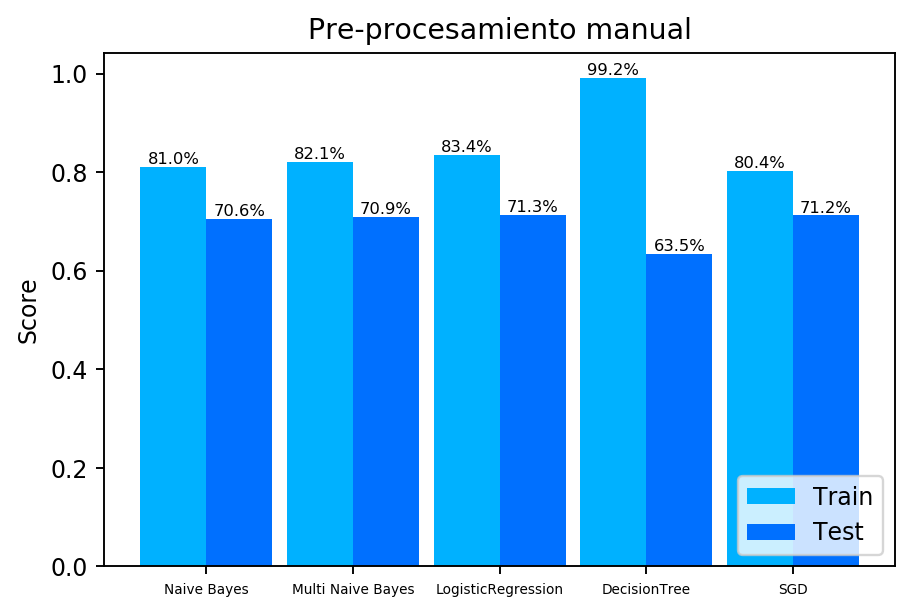

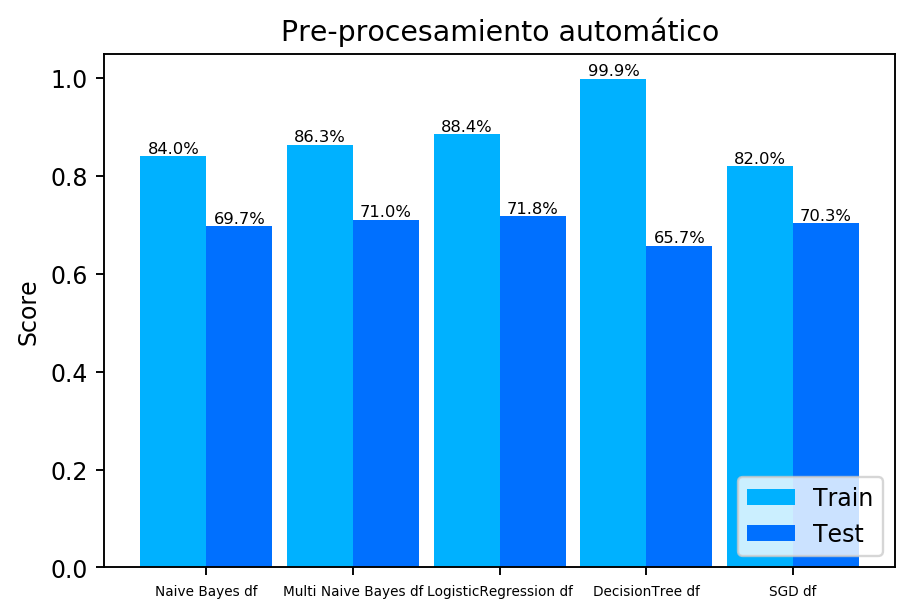

In [17]:
plot_scores("Pre-procesamiento manual",[naive_bayes, multi_naive_bayes, logistic, decision_tree, gradient_descent])
plot_scores("Pre-procesamiento automático",[naive_bayes_df, multi_naive_bayes_df, logistic_df, decision_tree_df, gradient_descent_df])

Cabe notar que modelos como _SVM_, _LDA_ y _QDA_ no fueron posibles de estudiar debido a que las operaciones entre matrices que estos necesitan son muy complicadas, probocando que el cálculo fuera muy largo o simplemente matando el kernel de python.

**g)** Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?

In [18]:
from sklearn.metrics import classification_report
def score_report(model, X, y):
    name = model[0]
    acc_tr = model[2]
    acc_test = model[3]
    print("Scores for "+name+":")
    print("\tTraining Accuracy: %f"%(acc_tr))
    print("\tTest Accuracy: %f"%(acc_test))
    print("\tDetailed Analysis Testing Results ...")
    print(classification_report(y, model[1].predict(X), target_names=['+','-']))
    print("")

In [19]:
score_report(naive_bayes, X_test, df_test['clase'])
score_report(multi_naive_bayes, X_test, df_test['clase'])
score_report(logistic, X_test, df_test['clase'])
score_report(decision_tree, X_test, df_test['clase'])
score_report(gradient_descent, X_test, df_test['clase'])

Scores for Naive Bayes:
	Training Accuracy: 0.810066
	Test Accuracy: 0.705809
	Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.69      0.49      0.57      3218
          -       0.71      0.85      0.78      4804

avg / total       0.70      0.71      0.69      8022


Scores for Multi Naive Bayes:
	Training Accuracy: 0.821491
	Test Accuracy: 0.708676
	Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.65      0.58      0.62      3218
          -       0.74      0.79      0.77      4804

avg / total       0.70      0.71      0.71      8022


Scores for LogisticRegression:
	Training Accuracy: 0.834262
	Test Accuracy: 0.712914
	Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.54      0.60      3218
          -       0.73      0.83      0.78      4804

avg / total       0.71      0.71      0.71 

**_f1-score_** puede ser interpretado como el promedio poderado de _precision_ y _recall_, siendo 0 y 1 los puntajes mínimos y máximos respectivamente.

**_precision_** está definido por $\frac{tp}{tp+fp}$, donde $tp$ y $fp$ son la cantidad de verdaderos y falsos positivos respectivamente, es decir, _precision_ denota la habilidad del clasificador de no etiquetar una muestra que es negativa como positiva.

**_recall_** está definido por $\frac{tp}{tp+fn}$, donde $fn$ es el número de falsos negativos. _recall_ denota la habilidad del clasificador de etiquetar todas las muestras positivas como positiva. 

**_support_** corresponde al número de ocurrencias de cada clase.

**h)** [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

In [20]:
import random
random.seed(14)
test_pred = logistic[1].predict_proba(X_test)
spl = random.sample(range(len(test_pred)), 15)

print("Negative \t Positive \t Tweet")
for i in spl:
    print(test_pred[i],"\t",df_test.reset_index()['content'][i])

Negative 	 Positive 	 Tweet
[ 0.53040671  0.46959329] 	 On my way to work wish I had more days off
[ 0.18207364  0.81792636] 	 @AprilAMiller Its 5:30 in the evening, sunset time
[ 0.30955208  0.69044792] 	 @mamapigeon I be ok, you?
[ 0.18337336  0.81662664] 	 watchin family guy
[ 0.14601211  0.85398789] 	 @BeSharp wow, great to know a piece of software ensures our timely project delivery  #ProductNamingRulez
[ 0.15249489  0.84750511] 	 @rachky @taltalush Yes. I am secure in my masculinity.
[ 0.08708965  0.91291035] 	 @issacfourth haha dork .. That sounds so yummy .. Share!
[ 0.19411533  0.80588467] 	 @cowmage  read something happy?
[ 0.85669033  0.14330967] 	 Ugh just got out of work i think i'm a dang taxi for ppl but i just can't say no!!!!  o well its my fault
[ 0.72362249  0.27637751] 	 @yourself_onfire I think Letitia is still trying to upload the digital, they were having problems before. I am sure she will let us know
[ 0.63851208  0.36148792] 	 http://twitpic.com/675u6 - Square

**i)** Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones), es decir, su trabajo será el de predecir una de las distintas emociones de cada _tweet_. Para esto utilice el mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.

In [21]:
clases['value']=[0,-1,1,-2,2,3,4,5,-3,-4,6,-5,-6]
sent = list(clases['sentiment'])
sent_v = list(clases['value'])
df_train['sentiment_class'] = df_train['sentiment'].apply(lambda x: sent_v[sent.index(x)])
df_test['sentiment_class'] = df_test['sentiment'].apply(lambda x: sent_v[sent.index(x)])

df_train.head()

,tweet_id,sentiment,author,content,norm_content,clase,sentiment_class
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, start, f...",-1,-4
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,"[layin, bed, headach, ughhh, ..., waitin, call...",-1,-2
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,"[want, hang, friend, soon]",1,6
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,"[want, trade, someon, houston, ticket, one]",1,0
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...","[sleep, think, old, friend, want, he', marri, ...",-1,-2


In [22]:
**j)** Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en cada _tweet_, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

SyntaxError: invalid syntax (<ipython-input-22-e543873f8e3d>, line 1)

In [ ]:
dt = train("DecisionTree",DecisionTreeClassifier(), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])
mnb = train("MultinomialNB",MultinomialNB(), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])
#mlp = train("Multi-layer Perceptron",MLPClassifier(), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])

Gráfico en item **m)**

**k)** Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs One y One vs All/Rest.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

nb_ovo = train("Naive Bayes OVO",OneVsOneClassifier(BernoulliNB()), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])
nb_ovr = train("Naive Bayes OVR",OneVsRestClassifier(BernoulliNB()), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])

**l)** Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases. Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

In [ ]:
lr_mtn = train("Log. Reg. Multi",LogisticRegression(), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])
lr_ovr = train("Log. Reg. OVR",OneVsRestClassifier(LogisticRegression()), X_train, df_train['sentiment_class'], X_test, df_test['sentiment_class'])

**m)** Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?

In [ ]:
plot_scores("Modelos Multi-clase",[dt, mnb, nb_ovo, nb_ovr, lr_mtn, lr_ovr])

Aquí nuevamente la regresión logística vuelve a obtener un score por sobre las otras técnicas, aúnque la diferencia es decimal.

Como se puede notar a simple vista, las diferencias de desempeño que hay entre la clasificación binaria y la multiclase es muy grande, esto puede ser debido principalmente a que la cantidad de datos que se posee no es suficiente para la multiclase, ya que por ejemplo para los tweets clasificados como _empty_, _enthusiasm_, _boredom_, y _anger_ se tienen entre 900 y 100 muestras, lo que hace que las predicciones sean muy poco "educadas", resultando en los errores mostrados. Esto no ocurre en el caso binario, ya que cada clase tiene al menos 16.000 muestras, siendo así un dataset aceptable para el experimento.